# Project 1: Dallas Accident Data Analysis
Data Source: US Accident from Kaggle <br />
A Countrywide Traffic Accident Dataset (2016 - 2019) <br />
link: https://www.kaggle.com/sobhanmoosavi/us-accidents <br />

Team Members: Brandon Bob, Junaho Shen, Qinan Wang

In [ ]:
import pandas as pd
import numpy as np

team = pd.DataFrame()
team['name'] = ['Junaho Shen', 'Qinan Wang']
team['ID'] = ['48058365','48098262']
team['email'] = ['junhaos@smu.edu','qinanw@smu.edu']
team

# 1. Business Understanding

This datasheet contains information that can be useful in identifying previous year vehicle accident trends within Dallas to identify where safety enhancements are needed.

The data was originally collected, according to Sobhan Moosavi from https://www.kaggle.com/sobhanmoosavi/us-accidents, has around 3 million rows and 49 features which including accidents locations, weather condition, accident severity level, environmental factors and other features to describe accident cases. 

The compeleted data visualization can provide straightforward advices to transportation company, traffic department, auto insurance companies for making business value in the future. Also, the navigation map can take the features we presented in the report to remind users for preventing possibly accident risk.

The datasheet description best explains how the database was collected (https://www.kaggle.com/sobhanmoosavi/us-accidents): "This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data is collected from February 2016 to December 2019, using several data providers, including two APIs that provide streaming traffic incident data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks."

Due to the oversize of dataset, we take Texas accidents data in 2019 as source dataset and distill all Dallas accidents as our research object.

As noted on https://www.nbcdfw.com/news/local/dallas-ranks-among-top-in-us-for-fatal-crashes-report/273443/, out of the largest 25 U.S. cities, Dallas is at the top of the list for traffic accidents. According to https://www.dallasnews.com/business/autos/2019/06/26/study-drivers-are-46-more-likely-to-get-into-accidents-on-dallas-roads-than-the-rest-of-the-u-s/, based on a study done by Allstate Dallas drivers are “46% more likely to get into a wreck than the average U.S. driver.

The goal for analyzing this data set is to find auto accident trends and hot locations that can assist the city with not only identifying where most accidents occur, but to also help make decisions on what locations should have a higher priority on safety enhancements.

If our predictions are correct, we would expect that after a location has been identified as a hot spot for auto accidents and has been “safety enhanced” by the city, there should be at least a 75% chance of a drop in auto accidents around that area. The reason we cannot guarantee a 100% chance of auto accident reductions is because some people are just simply bad drivers. 

# 2. Data Understanding
## 2.1 Data Description

In [2]:
print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

df = pd.read_csv('../data/2019_TX_Accidents.csv') # read in the csv file

df.tail()

Pandas: 0.25.1
Numpy: 1.17.2


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
298057,A-2974091,Bing,NaN,2,2019-08-23 13:16:19,2019-08-23 13:45:28,29.749589,-95.456110,29.742630,-95.457930,...,False,False,False,False,False,False,Day,Day,Day,Day
298058,A-2974092,Bing,NaN,3,2019-08-23 13:04:19,2019-08-23 13:33:52,29.778089,-95.373146,29.774183,-95.368235,...,False,False,False,False,False,False,Day,Day,Day,Day
298059,A-2974093,Bing,NaN,3,2019-08-23 13:00:34,2019-08-23 13:30:14,29.774190,-95.320940,29.774180,-95.312270,...,False,False,False,False,False,False,Day,Day,Day,Day
298060,A-2974095,Bing,NaN,3,2019-08-23 16:44:23,2019-08-23 17:11:49,29.941686,-95.295187,29.926120,-95.302110,...,False,False,False,False,False,False,Day,Day,Day,Day
298061,A-2974096,Bing,NaN,3,2019-08-23 17:32:09,2019-08-23 18:02:03,29.971810,-95.562340,29.960230,-95.546779,...,False,False,False,False,False,False,Day,Day,Day,Day


Before we start to work on 2019 Dallas accident data, we need to filter the data we need from 2019 Texas data, once we limit our research goal to Dallas, the data size down to 58,086 rows from 300,000 rows data from 2019 Texas data.

In [3]:
city_filter = df.City.str.contains('Dallas')
df = df[city_filter]
print(df.shape[0],'rows')

58086 rows


Now that we have limited our data to 58,086 rows, we can now begin analyizing the data given to us. Currently there are 49 features to this dataset. The field descriptions from https://smoosavi.org/datasets/us_accidents has shown all 49 features in the dataset. 

In [4]:
all_features = pd.read_csv('../data/US_accident_features.csv')
# remove unrequired columns
all_features.drop(['#','Nullable'], axis = 1,inplace = True)
pd.set_option('display.max_colwidth', 100)
all_features

,Attribute,Description
0,ID,This is a unique identifier of the accident record.
1,Source,Indicates source of the accident report (i.e. the API which reported the accident.).
2,TMC,A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed de...
3,Severity,"Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact..."
4,Start_Time,Shows start time of the accident in local time zone.
5,End_Time,Shows end time of the accident in local time zone.
6,Start_Lat,Shows latitude in GPS coordinate of the start point.
7,Start_Lng,Shows longitude in GPS coordinate of the start point.
8,End_Lat,Shows latitude in GPS coordinate of the end point.
9,End_Lng,Shows longitude in GPS coordinate of the end point.


We can remove following features because we only need Dallas accident data: 'Number','Street'.'Side','City','County','State','Zipcode','Country','TimeZone','Airport_Code','Weather_Timestamp'.

And also, we remove the columns which is redundant or semantically useless:
'ID', 'Source', 'TMC', 'End_Time', 'End_Lat', 'End_Lng', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight'
and obtain following fields which match our business needs in the analysis. 

In [5]:
features = all_features.drop(all_features.index[[5,8,9]])
features = features.drop(all_features.index[0:3])
features = features.drop(all_features.index[11:23])
features = features.drop(all_features.index[32:45])
features = features.drop(all_features.index[46:49])
features = features.reset_index(drop=True)
features

,Attribute,Description
0,Severity,"Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact..."
1,Start_Time,Shows start time of the accident in local time zone.
2,Start_Lat,Shows latitude in GPS coordinate of the start point.
3,Start_Lng,Shows longitude in GPS coordinate of the start point.
4,Distance(mi),The length of the road extent affected by the accident.
5,Temperature(F),Shows the temperature (in Fahrenheit).
6,Wind_Chill(F),Shows the wind chill (in Fahrenheit).
7,Humidity(%),Shows the humidity (in percentage).
8,Pressure(in),Shows the air pressure (in inches).
9,Visibility(mi),Shows visibility (in miles).


we can see the features from **Amenity** to **Stop** are all point of interests(POI) annotation which indicate presence in around environment. 

In [6]:
features_selected = features["Attribute"]
df = df[features_selected]
df.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset
5,2,2016-11-30 16:10:04,32.662193,-96.943153,0.01,60.1,NaN,24.0,30.00,10.0,Variable,5.8,NaN,Clear,Day
6,3,2016-11-30 16:05:32,32.778790,-96.782021,0.01,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,Day
7,2,2016-11-30 16:10:46,32.724277,-96.762245,0.00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,Day
8,2,2016-11-30 15:45:59,32.708355,-96.700043,0.00,59.0,NaN,23.0,30.02,10.0,WNW,10.4,NaN,Clear,Day
9,3,2016-11-30 16:06:04,32.864021,-96.661140,0.01,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,Day


Now that we have limited the data, it's time to take a look at some data statistics to see what we are working with within this dataset.

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,58086.000000,58086.000000,58086.000000,58086.000000,57927.000000,16738.000000,57919.000000,57989.000000,57906.000000,54629.000000,16395.000000
mean,2.382312,32.811202,-96.796752,0.095629,69.001927,58.560867,63.597783,29.902372,9.431069,9.679602,0.019840
std,0.502880,0.086146,0.072640,0.279749,17.112714,23.191381,20.893385,0.319820,2.227893,5.171056,0.087521
min,1.000000,32.620309,-97.072350,0.000000,12.900000,2.000000,4.000000,28.750000,0.100000,0.000000,0.000000
25%,2.000000,32.752560,-96.840315,0.000000,57.000000,38.000000,47.000000,29.770000,10.000000,6.000000,0.000000
50%,2.000000,32.798169,-96.799248,0.000000,71.600000,62.500000,65.000000,29.960000,10.000000,9.200000,0.000000
75%,3.000000,32.885430,-96.752739,0.010000,82.000000,78.000000,81.000000,30.100000,10.000000,12.700000,0.000000
max,4.000000,33.129891,-96.557159,6.920000,109.900000,103.000000,100.000000,30.860000,111.000000,255.000000,2.280000


In [8]:
df['Sunrise_Sunset'].unique()
# change Sunrise_Sunset to numeric data
# df.loc[df['Sunrise_Sunset']== 'Day']= 1
# df.loc[df['Sunrise_Sunset']== 'Night']= 0
print(df.dtypes)
print('======================================')
print(df.info())
df.head()

Severity               int64
Start_Time            object
Start_Lat            float64
Start_Lng            float64
Distance(mi)         float64
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Sunrise_Sunset        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 58086 entries, 5 to 298052
Data columns (total 15 columns):
Severity             58086 non-null int64
Start_Time           58086 non-null object
Start_Lat            58086 non-null float64
Start_Lng            58086 non-null float64
Distance(mi)         58086 non-null float64
Temperature(F)       57927 non-null float64
Wind_Chill(F)        16738 non-null float64
Humidity(%)          57919 non-null float64
Pressure(in)         57989 non-null float64
Visibility(mi)       57906 non-null float64
Wind

,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset
5,2,2016-11-30 16:10:04,32.662193,-96.943153,0.01,60.1,NaN,24.0,30.00,10.0,Variable,5.8,NaN,Clear,Day
6,3,2016-11-30 16:05:32,32.778790,-96.782021,0.01,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,Day
7,2,2016-11-30 16:10:46,32.724277,-96.762245,0.00,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,Day
8,2,2016-11-30 15:45:59,32.708355,-96.700043,0.00,59.0,NaN,23.0,30.02,10.0,WNW,10.4,NaN,Clear,Day
9,3,2016-11-30 16:06:04,32.864021,-96.661140,0.01,61.0,NaN,22.0,30.01,10.0,NNW,4.6,NaN,Clear,Day


This does give us all fields. Looks like the data types that were missing from our dataset was bool and object data types. From looking at this, it looks like Number, Precipitation, Wind Chill, and Wind Speed are missing the most data but it's hard to tell from the table and statistics above how many records are affected.

But, using an additional library called missingno, we can see the missing data visually. By using the following command to install into Andaconda's distribution, we can run the additional library:<br />
`install conda install -c conda-forge missingno`

## 2.2 Data Quality
before we start to work on dataset, we need to find duplicates and impute missing data

In [9]:
# find the duplicate instances
dupdf = df.duplicated()

# find the number of duplicate
len(df[dupdf])
#df[dupdf]

114

because we already removed ID for each row and the rate of duplicate data is very low(114/58086 = 0.00196), so we decide to keep the data, it will cause less affect to our result

In [10]:
# Lets aggregate by severity first
df_grouped = df.groupby(by='Severity')
for val,grp in df_grouped:
    print('There were',len(grp),'accidents in',val,'severity level.')

There were 18 accidents in 1 severity level.
There were 36311 accidents in 2 severity level.
There were 21289 accidents in 3 severity level.
There were 468 accidents in 4 severity level.


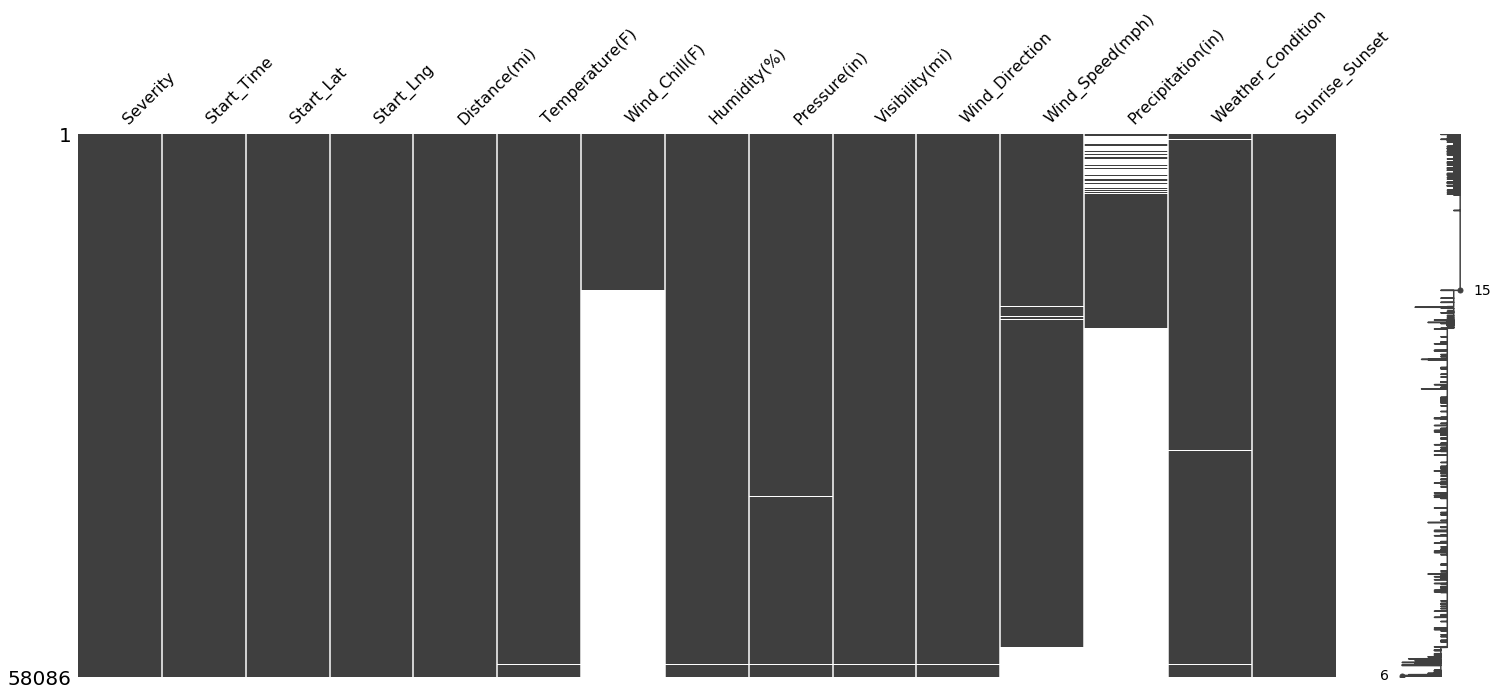

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df.sort_values(by=['Wind_Chill(F)','Precipitation(in)','Wind_Speed(mph)']))

We can see Wind Chill has a large chunk of data missing and it may not be useful in our business case, because we already have Temperature(F) data as a same measurement.

Precipitation seems to be missing a large chunk of data and this is an important feature for us to analysis the correlation, but fortunately, we find the majority of missing data in percipitation just because of no rain weather. Thus we can easily impute percipitation data by adding zero.

Wind speed has some missing data around 4000 and it is also a important factor which would cause an accident.
we can impute these missing data by using K-nearest neighbours algorithm.

In [12]:
# impute based upon the K closest samples (rows)
from sklearn.impute import KNNImputer
import copy

# remove wind chill features first
df = df.drop(['Wind_Chill(F)'],axis = 1)
# add zero to misssing data of Precipitation
temp = df.fillna({'Precipitation(in)':0})
# get object for imputation
knn_obj = KNNImputer(n_neighbors=5)

# create a numpy matrix from pandas numeric values to impute
temp = temp[['Severity','Pressure(in)','Visibility(mi)','Temperature(F)','Wind_Speed(mph)','Humidity(%)','Precipitation(in)']].to_numpy()

# use sklearn imputation object
knn_obj.fit(temp)
temp_imputed = knn_obj.transform(temp)

# this is VERY IMPORTANT, make a deep copy, not just a reference to the object
df_imputed = copy.deepcopy(df) # not just an alias
df_imputed[['Severity','Pressure(in)','Visibility(mi)','Temperature(F)','Wind_Speed(mph)','Humidity(%)','Precipitation(in)']] = temp_imputed
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58086 entries, 5 to 298052
Data columns (total 14 columns):
Severity             58086 non-null float64
Start_Time           58086 non-null object
Start_Lat            58086 non-null float64
Start_Lng            58086 non-null float64
Distance(mi)         58086 non-null float64
Temperature(F)       58086 non-null float64
Humidity(%)          58086 non-null float64
Pressure(in)         58086 non-null float64
Visibility(mi)       58086 non-null float64
Wind_Direction       58001 non-null object
Wind_Speed(mph)      58086 non-null float64
Precipitation(in)    58086 non-null float64
Weather_Condition    57815 non-null object
Sunrise_Sunset       58086 non-null object
dtypes: float64(10), object(4)
memory usage: 6.6+ MB


Now that we have cleaned up our data, we want to see what continuous features can be converted into discrete values. Let's take a look at our current data statistics since this will remove object and boolean types for us.

In [13]:
#df_imputed['Weather_Condition'].unique()

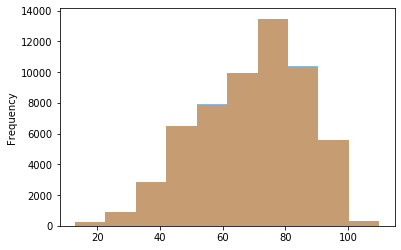

In [14]:
df_imputed['Temperature(F)'].plot(kind='hist',alpha=0.5)
df['Temperature(F)'].plot(kind='hist', alpha=0.5)

plt.show()

Creating discrete values...verbiage will come later

In [15]:
df_imputed['Discrete_Temp'] = pd.cut(df['Temperature(F)'],[0,32,50,65,80,1e6],
                             labels=['freezing','cold','cool','warm','hot'])

df_imputed.Discrete_Temp.describe()

count     57927
unique        5
top        warm
freq      17928
Name: Discrete_Temp, dtype: object

In [16]:
df_grouped = df_imputed.groupby(by=['Severity','Discrete_Temp'])
df_severity = df.groupby(by=['Severity'])
print (df_grouped['Severity'].count()/df_severity['Severity'].count() * 100)
print (df_grouped['Severity'].count())

Severity  Discrete_Temp
1.0       cold             22.222222
          cool             27.777778
          warm             38.888889
          hot              11.111111
2.0       freezing          1.842417
          cold             14.364793
          cool             21.676627
          warm             31.252238
          hot              30.591281
3.0       freezing          2.127859
          cold             16.210249
          cool             22.072432
          warm             30.226878
          hot              29.085443
4.0       freezing          1.709402
          cold             16.452991
          cool             26.923077
          warm             29.487179
          hot              25.213675
Name: Severity, dtype: float64
Severity  Discrete_Temp
1.0       cold                 4
          cool                 5
          warm                 7
          hot                  2
2.0       freezing           669
          cold              5216
          cool      

### Questions to answer:
    1.What time of the year did most accidents happen in Dallas?
    2.Are there any special environmental conditions that played a part in the accidents?
    3.What area of Dallas has the largest concentration of accidents?

# 3. Data Visualization

Additional includes were added in these as noted in examples. Did not want to use same data.

In [17]:
## 3.2 Histogram and Kernel Density

Matplotlib: 3.1.1


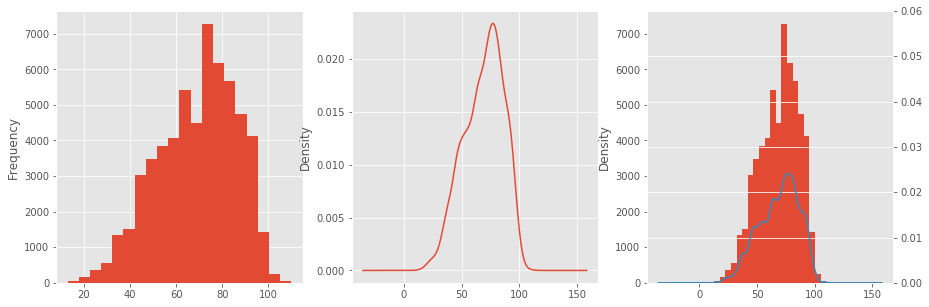

In [18]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

print('Matplotlib:', matplotlib. __version__)

plt.style.use('ggplot')

fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
df_imputed['Temperature(F)'].plot.hist(bins=20)

plt.subplot(1,3,2)
df_imputed['Temperature(F)'].plot.kde(bw_method=0.2)

plt.subplot(1,3,3)
df_imputed['Temperature(F)'].plot.hist(bins=20)
df_imputed['Temperature(F)'].plot.kde(bw_method=0.1, secondary_y=True)
plt.ylim([0, 0.06])

plt.show()


## 3.3 Feature Correlation Plot

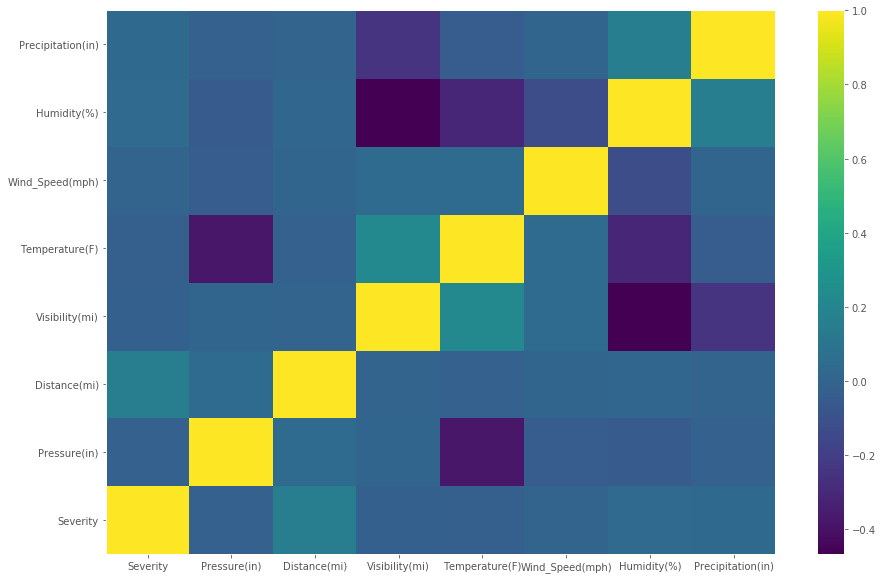

In [19]:
#plot the correlation matrix 
'''
Example from: https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db
'''
vars_to_use = ['Severity','Pressure(in)','Distance(mi)','Visibility(mi)','Temperature(F)','Wind_Speed(mph)','Humidity(%)','Precipitation(in)'] # pick vars
plt.pcolor(df_imputed[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

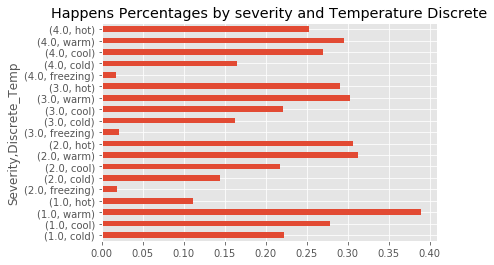

In [20]:
happens_rate = df_grouped['Severity'].count()/df_severity['Severity'].count()
ax = happens_rate.plot(kind='barh')
plt.title('Happens Percentages by severity and Temperature Discrete')
plt.show()

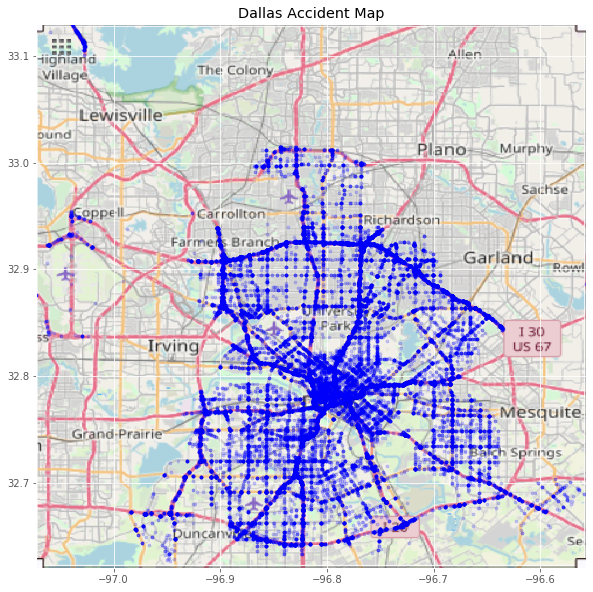

In [21]:
map_box = (df.Start_Lng.min(), df.Start_Lng.max(),
        df.Start_Lat.min(), df.Start_Lat.max())

ruh_m = plt.imread('DallasImage.png')

fig, ax = plt.subplots(figsize = (10,10))

ax.scatter(df.Start_Lng, df.Start_Lat, zorder=1, alpha= 0.2, c='b', s=10)

ax.set_title('Dallas Accident Map')
ax.set_xlim(map_box[0],map_box[1])
ax.set_ylim(map_box[2],map_box[3])

ax.imshow(ruh_m, zorder=0, extent = map_box, aspect = 'equal')

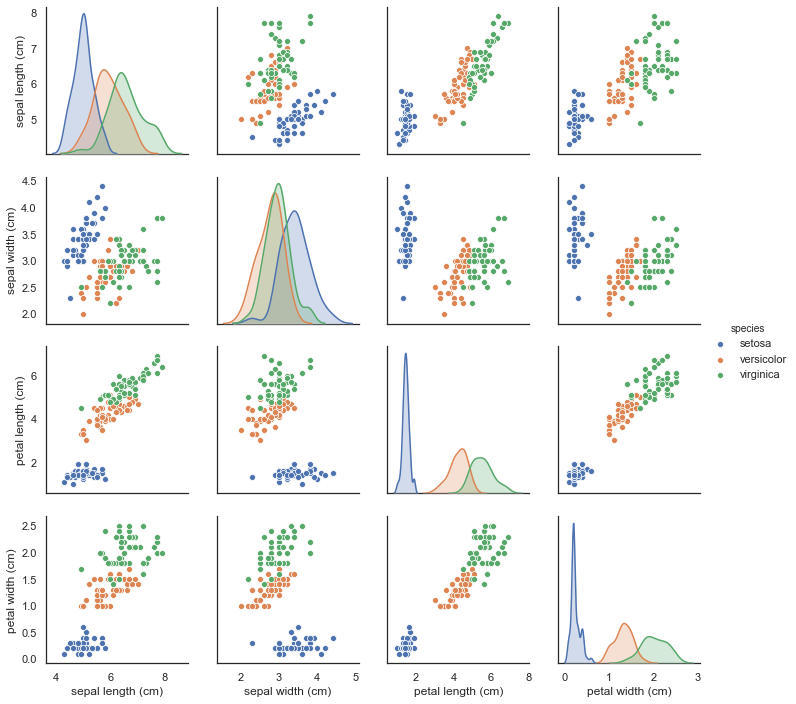

In [22]:
'''
EXAMPLE OF UMAP WORKING FROM https://umap-learn.readthedocs.io/en/latest/basic_usage.html
we might not use it all but bokeh is something we can really use

conda install commands:
conda install -c conda-forge pynndescent
conda install -c conda-forge umap-learn
conda install datashader
conda install -c pyviz holoviews bokeh
'''

import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

iris = load_iris()
# print(iris.DESCR)

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series(iris.target).map(dict(zip(range(3),iris.target_names)))
sns.pairplot(iris_df, hue='species');

In [23]:
import umap
reducer = umap.UMAP()

embedding = reducer.fit_transform(iris.data)
embedding.shape

plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in iris.target])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset', fontsize=24);

ModuleNotFoundError: No module named 'umap'

In [ ]:
digits = load_digits()
# print(digits.DESCR)

fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

digits_df = pd.DataFrame(digits.data[:,:10])
digits_df['digit'] = pd.Series(digits.target).map(lambda x: 'Digit {}'.format(x))
sns.pairplot(digits_df, hue='digit', palette='Spectral');

In [ ]:
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)

embedding = reducer.transform(digits.data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [ ]:
from io import BytesIO
from PIL import Image
import base64

def embeddable_image(data):
    img_data = 255 - 15 * data.astype(np.uint8)
    image = Image.fromarray(img_data, mode='L').resize((64, 64), Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()

digits_df = pd.DataFrame(embedding, columns=('x', 'y'))
digits_df['digit'] = [str(x) for x in digits.target]
digits_df['image'] = list(map(embeddable_image, digits.images))

datasource = ColumnDataSource(digits_df)
color_mapping = CategoricalColorMapper(factors=[str(9 - x) for x in digits.target_names],
                                       palette=Spectral10)

plot_figure = figure(
    title='UMAP projection of the Digits dataset',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <img src='@image' style='float: left; margin: 5px 5px 5px 5px'/>
    </div>
    <div>
        <span style='font-size: 16px; color: #224499'>Digit:</span>
        <span style='font-size: 18px'>@digit</span>
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='digit', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)